In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv
/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [3]:
obesity_df_basic = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
obesity_df_original = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')
obesity_test = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

In [4]:
test_data= obesity_test

In [5]:
print(obesity_df_original.info())
print(obesity_df_original.shape)
print(obesity_df_original.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
obesity_df= pd.concat([obesity_df_basic, obesity_df_original]).drop_duplicates()

In [7]:
print(obesity_df_basic.shape)
print(obesity_df_original.shape)
print(obesity_df.shape)

(20758, 18)
(2111, 17)
(22845, 18)


In [8]:
obesity_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1.0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2.0,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3.0,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4.0,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
obesity_test.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [10]:
print(obesity_df.info())
print(obesity_df.shape)
print(obesity_df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 22845 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  float64
 1   Gender                          22845 non-null  object 
 2   Age                             22845 non-null  float64
 3   Height                          22845 non-null  float64
 4   Weight                          22845 non-null  float64
 5   family_history_with_overweight  22845 non-null  object 
 6   FAVC                            22845 non-null  object 
 7   FCVC                            22845 non-null  float64
 8   NCP                             22845 non-null  float64
 9   CAEC                            22845 non-null  object 
 10  SMOKE                           22845 non-null  object 
 11  CH2O                            22845 non-null  float64
 12  SCC                             22845 

In [11]:
print(obesity_test.info())
print(obesity_test.shape)
print(obesity_test.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [12]:
obesity_df= obesity_df.drop('id', axis=1)
obesity_df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [13]:
id_forlater = obesity_test['id']
obesity_test= obesity_test.drop('id', axis=1)

In [14]:
num_cols= ['Age', 'Height', 'Weight', 'FCVC', 'NCP','CH2O','FAF', 'TUE']
object_cols = ['Gender', 'family_history_with_overweight', 'FAVC','CAEC','SMOKE', 'SCC','CALC', 'MTRANS']

In [15]:
obesity_df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [16]:
for i in object_cols:
    print(obesity_df[i].value_counts())

Gender
Female    11457
Male      11388
Name: count, dtype: int64
family_history_with_overweight
yes    18736
no      4109
Name: count, dtype: int64
FAVC
yes    20826
no      2019
Name: count, dtype: int64
CAEC
Sometimes     19290
Frequently     2708
Always          531
no              316
Name: count, dtype: int64
SMOKE
no     22556
yes      289
Name: count, dtype: int64
SCC
no     22062
yes      783
Name: count, dtype: int64
CALC
Sometimes     16446
no             5799
Frequently      599
Always            1
Name: count, dtype: int64
MTRANS
Public_Transportation    18245
Automobile                3990
Walking                    522
Motorbike                   49
Bike                        39
Name: count, dtype: int64


In [17]:
for i in object_cols:
    print(obesity_test[i].value_counts())

Gender
Female    6965
Male      6875
Name: count, dtype: int64
family_history_with_overweight
yes    11384
no      2456
Name: count, dtype: int64
FAVC
yes    12583
no      1257
Name: count, dtype: int64
CAEC
Sometimes     11689
Frequently     1617
Always          359
no              175
Name: count, dtype: int64
SMOKE
no     13660
yes      180
Name: count, dtype: int64
SCC
no     13376
yes      464
Name: count, dtype: int64
CALC
Sometimes     9979
no            3513
Frequently     346
Always           2
Name: count, dtype: int64
MTRANS
Public_Transportation    11111
Automobile                2405
Walking                    280
Bike                        25
Motorbike                   19
Name: count, dtype: int64


In [18]:
ordinal_cols = ['CAEC','CALC', 'MTRANS', 'NObeyesdad']
binary_cols = ['Gender', 'family_history_with_overweight','FAVC','SMOKE', 'SCC']

In [19]:
print(obesity_df.info())
print(obesity_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22845 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22845 non-null  object 
 1   Age                             22845 non-null  float64
 2   Height                          22845 non-null  float64
 3   Weight                          22845 non-null  float64
 4   family_history_with_overweight  22845 non-null  object 
 5   FAVC                            22845 non-null  object 
 6   FCVC                            22845 non-null  float64
 7   NCP                             22845 non-null  float64
 8   CAEC                            22845 non-null  object 
 9   SMOKE                           22845 non-null  object 
 10  CH2O                            22845 non-null  float64
 11  SCC                             22845 non-null  object 
 12  FAF                             22845 

In [20]:
# # Apply ordinal encoder to each column with categorical data
# ordinal_encoder = OrdinalEncoder()
# obesity_df[binary_cols] = ordinal_encoder.fit_transform(obesity_df[binary_cols])

In [21]:
obesity_df['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [22]:
CAEC = pd.CategoricalDtype(['no','Sometimes', 'Frequently', 'Always'], ordered=True)
CALC = pd.CategoricalDtype(['no', 'Sometimes', 'Frequently', 'Always'], ordered=True)
MTRANS = pd.CategoricalDtype(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike'], ordered=False)
# NObeyesdad = pd.CategoricalDtype([ 'Insufficient_Weight','Normal_Weight', 'Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'], ordered=True)

In [23]:
obesity_df['CAEC']= obesity_df['CAEC'].astype(CAEC)
obesity_df['CALC']= obesity_df['CALC'].astype(CALC)
obesity_df['MTRANS']= obesity_df['MTRANS'].astype(MTRANS)
# obesity_df['NObeyesdad']= obesity_df['NObeyesdad'].astype(NObeyesdad)

In [24]:
obesity_test['CAEC']= obesity_test['CAEC'].astype(CAEC)
obesity_test['CALC']= obesity_test['CALC'].astype(CALC)
obesity_test['MTRANS']= obesity_test['MTRANS'].astype(MTRANS)

In [25]:
print(obesity_df.info())
print(obesity_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 22845 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          22845 non-null  object  
 1   Age                             22845 non-null  float64 
 2   Height                          22845 non-null  float64 
 3   Weight                          22845 non-null  float64 
 4   family_history_with_overweight  22845 non-null  object  
 5   FAVC                            22845 non-null  object  
 6   FCVC                            22845 non-null  float64 
 7   NCP                             22845 non-null  float64 
 8   CAEC                            22845 non-null  category
 9   SMOKE                           22845 non-null  object  
 10  CH2O                            22845 non-null  float64 
 11  SCC                             22845 non-null  object  
 12  FAF                     

In [26]:
# relevant_experience = pd.CategoricalDtype(['Has relevant experience','No relevant experience'], ordered=True)
# ds_jobs_clean['relevant_experience']= ds_jobs_clean['relevant_experience'].astype(relevant_experience)

In [27]:
# OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# obesity_cols_oh = pd.DataFrame(OH_encoder.fit_transform(obesity_df[ordinal_cols]))

# # One-hot encoding removed index; put it back
# obesity_cols_oh.index = obesity_df.index

# # Remove categorical columns (will replace with one-hot encoding)
# nums = obesity_df.drop(ordinal_cols, axis=1)

# # Add one-hot encoded columns to numerical features
# obesity_df_oh = pd.concat([nums, obesity_cols_oh], axis=1)

In [28]:
ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
obesity_df[object_cols] = ordinal_encoder.fit_transform(obesity_df[object_cols])

In [29]:
obesity_test[object_cols] = ordinal_encoder.transform(obesity_test[object_cols])

In [30]:
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22845 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22845 non-null  float64
 1   Age                             22845 non-null  float64
 2   Height                          22845 non-null  float64
 3   Weight                          22845 non-null  float64
 4   family_history_with_overweight  22845 non-null  float64
 5   FAVC                            22845 non-null  float64
 6   FCVC                            22845 non-null  float64
 7   NCP                             22845 non-null  float64
 8   CAEC                            22845 non-null  float64
 9   SMOKE                           22845 non-null  float64
 10  CH2O                            22845 non-null  float64
 11  SCC                             22845 non-null  float64
 12  FAF                             22845 

In [31]:
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1.0,24.443011,1.699998,81.669950,1.0,1.0,2.000000,2.983297,2.0,0.0,2.763573,0.0,0.000000,0.976473,2.0,3.0,Overweight_Level_II
1,0.0,18.000000,1.560000,57.000000,1.0,1.0,2.000000,3.000000,1.0,0.0,2.000000,0.0,1.000000,1.000000,3.0,0.0,Normal_Weight
2,0.0,18.000000,1.711460,50.165754,1.0,1.0,1.880534,1.411685,2.0,0.0,1.910378,0.0,0.866045,1.673584,3.0,3.0,Insufficient_Weight
3,0.0,20.952737,1.710730,131.274851,1.0,1.0,3.000000,3.000000,2.0,0.0,1.674061,0.0,1.467863,0.780199,2.0,3.0,Obesity_Type_III
4,1.0,31.641081,1.914186,93.798055,1.0,1.0,2.679664,1.971472,2.0,0.0,1.979848,0.0,1.967973,0.931721,2.0,3.0,Overweight_Level_II


In [32]:
X= obesity_df.drop('NObeyesdad', axis=1)
y= obesity_df['NObeyesdad']

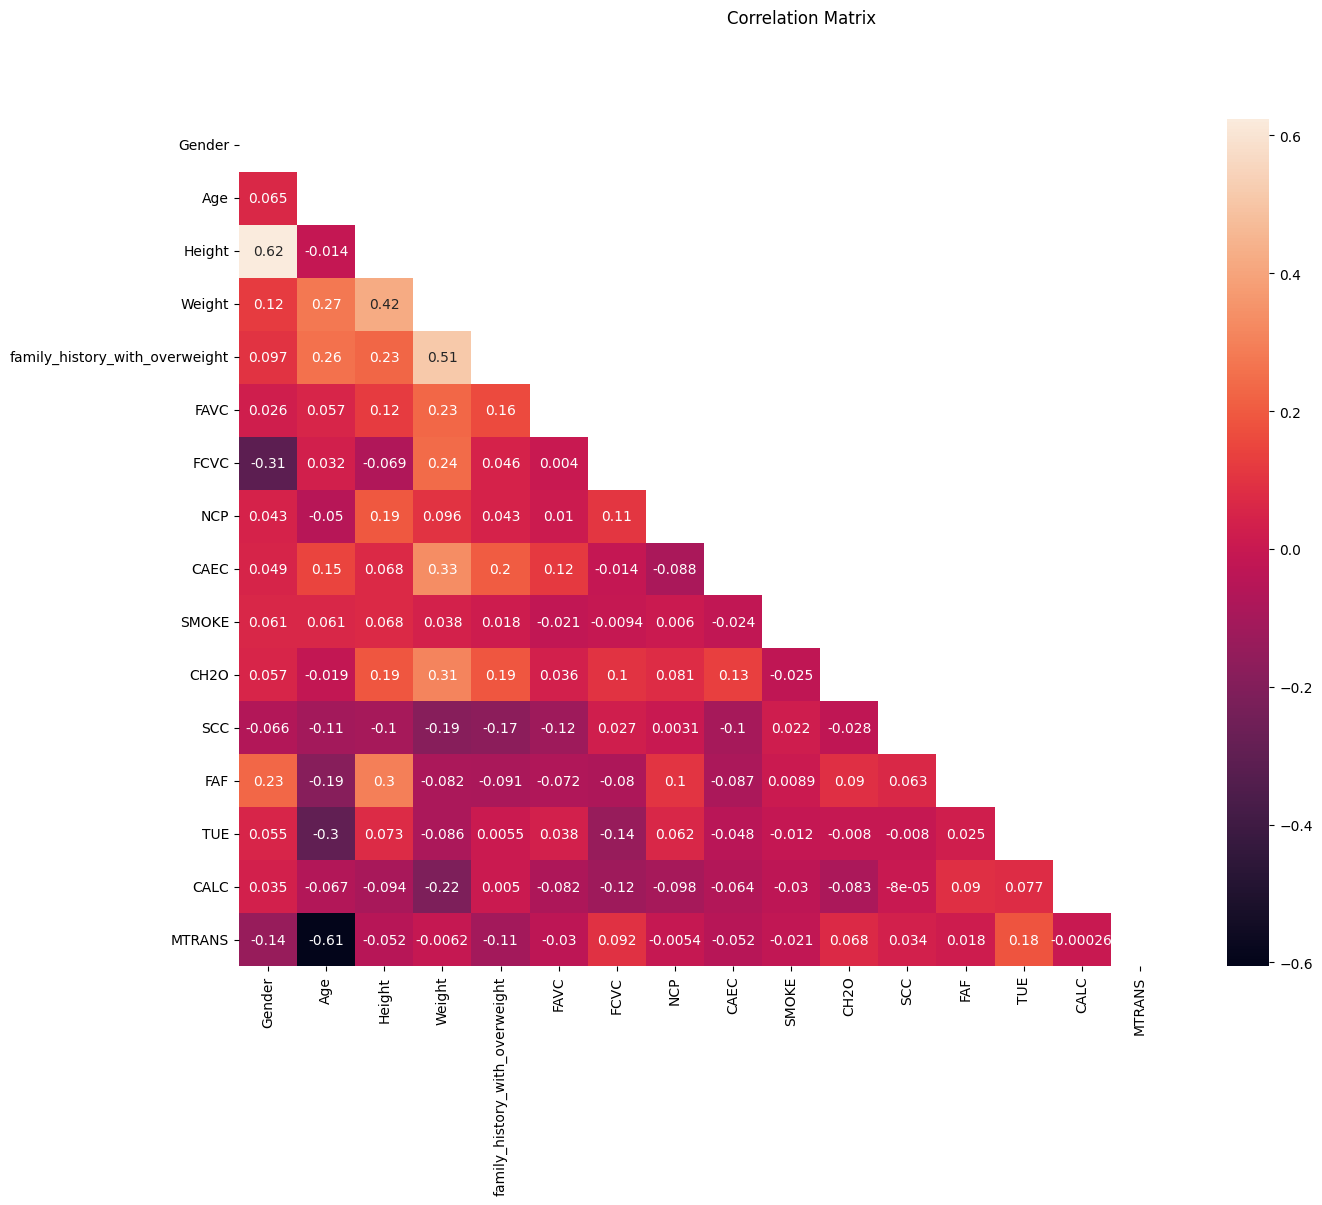

In [33]:
corr_matrix=X.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()

In [34]:
# y_encoder= OrdinalEncoder()
# y = y_encoder.fit_transform(y.array.reshape(-1, 1))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [36]:

# # Define the objective function for Optuna optimization
# import optuna
# from optuna.samplers import TPESampler

# def objective(trial, X_train, y_train, X_test, y_test):
#      # Define parameters to be optimized for the LGBMClassifier
#      param = {
#          "objective": "multiclass",
#          "metric": "multi_logloss",
#          "verbosity": -1,
#          "boosting_type": "gbdt",
#          "random_state": 42,
#          "num_class": 7,
#          "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.2),
#          "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
#          "lambda_l1": trial.suggest_float("lambda_l1", 0.005, 0.015),
#          "lambda_l2": trial.suggest_float("lambda_l2", 0.02, 0.06),
#          "max_depth": trial.suggest_int("max_depth", 5, 20),
#          "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.9),
#          "subsample": trial.suggest_float("subsample", 0.8, 1.0),
#          "min_child_samples": trial.suggest_int("min_child_samples", 5, 50),
#      }

#  # LGBMClassifier with the suggested parameters
#      test_model = LGBMClassifier(**param)
    
# # Fit 
#      test_model.fit(X_train, y_train)

# # Evaluate
#      score = test_model.score(X_test, y_test)

#      return score

# # Train Test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


# #sampler for Optuna optimization
# sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# # Create a study object
# study = optuna.create_study(direction="maximize", sampler=sampler)

# # Run the optimization process
# study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=50)

# # best parameters after optimization
# best_params = study.best_params

# print('='*50)
# print(best_params)

In [37]:
best_params = {
    "objective": "multiclass",          # Objective function for the model
    "metric": "multi_logloss",          # Evaluation metric
    "verbosity": -1,                    # Verbosity level (-1 for silent)
    "boosting_type": "gbdt",            # Gradient boosting type
    "random_state": 42,       # Random state for reproducibility
    "num_class": 7,                     # Number of classes in the dataset
    'learning_rate': 0.02936906933290947, 
    'n_estimators': 359, 
    'lambda_l1': 0.014125838338031285, 
    'lambda_l2': 0.034510251329305505, 
    'max_depth': 14, 
    'colsample_bytree': 0.393655304699096, 
    'subsample': 0.9893518624562953, 
    'min_child_samples': 22
#     'learning_rate': 0.01197852738297134,  # Learning rate for gradient boosting
#     'n_estimators': 509,                # Number of boosting iterations
#     'lambda_l1': 0.009715116714365275,  # L1 regularization term
#     'lambda_l2': 0.03853395161282091,   # L2 regularization term
#     'max_depth': 11,                    # Maximum depth of the trees
#     'colsample_bytree': 0.7364306508830604,  # Fraction of features to consider for each tree
#     'subsample': 0.9529973839959326,    # Fraction of samples to consider for each boosting iteration
#     'min_child_samples': 17             # Minimum number of data needed in a leaf
}

In [38]:
model = LGBMClassifier(**best_params)

model.fit(X_train,y_train)
y_pred= model.predict(X_test)

In [39]:
confusion_matrix(y_test, y_pred)

array([[543,  28,   0,   0,   0,   2,   1],
       [ 32, 612,   0,   0,   0,  30,   3],
       [  1,   3, 601,  22,   2,  19,  34],
       [  0,   0,  14, 679,   0,   0,   4],
       [  0,   1,   3,   0, 874,   0,   0],
       [  5,  32,   5,   0,   0, 429,  54],
       [  0,   6,  27,   2,   0,  50, 451]])

In [40]:
#Displaying model's performance on Train and Test set
print("Decision Tree (XGBoost) Model's performance on Train, and Test set:")
print(f"The model's accuracy on the test set is: {accuracy_score(y_test,y_pred)}\n")
print(f"The model's classification report on the test set\n {classification_report(y_test,y_pred)}")

Decision Tree (XGBoost) Model's performance on Train, and Test set:
The model's accuracy on the test set is: 0.9168308163711972

The model's classification report on the test set
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.95      0.94       574
      Normal_Weight       0.90      0.90      0.90       677
     Obesity_Type_I       0.92      0.88      0.90       682
    Obesity_Type_II       0.97      0.97      0.97       697
   Obesity_Type_III       1.00      1.00      1.00       878
 Overweight_Level_I       0.81      0.82      0.81       525
Overweight_Level_II       0.82      0.84      0.83       536

           accuracy                           0.92      4569
          macro avg       0.91      0.91      0.91      4569
       weighted avg       0.92      0.92      0.92      4569



In [41]:
predictions = model.predict(obesity_test)

In [42]:
predictions

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [43]:
submission = pd.DataFrame({"id": test_data["id"], "NObeyesdad": predictions})
submission.to_csv("submission.csv", index=False)

In [44]:
submission.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
